<a href="https://colab.research.google.com/github/Kishankumar1328/-DATA-ANALYSICS/blob/main/employee_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
import plotly as px
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")


In [121]:
df=pl.read_csv("/content/watson_healthcare_modified.csv")
df

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1313919,41,"""No""","""Travel_Rarely""",1102,"""Cardiology""",1,2,"""Life Sciences""",1,2,"""Female""",94,3,2,"""Nurse""",4,"""Single""",5993,19479,8,"""Y""","""Yes""",11,3,1,80,0,8,0,1,6,4,0,5
1200302,49,"""No""","""Travel_Frequen…",279,"""Maternity""",8,1,"""Life Sciences""",1,3,"""Male""",61,2,2,"""Other""",2,"""Married""",5130,24907,1,"""Y""","""No""",23,4,4,80,1,10,3,3,10,7,1,7
1060315,37,"""Yes""","""Travel_Rarely""",1373,"""Maternity""",2,2,"""Other""",1,4,"""Male""",92,2,1,"""Nurse""",3,"""Single""",2090,2396,6,"""Y""","""Yes""",15,3,2,80,0,7,3,3,0,0,0,0
1272912,33,"""No""","""Travel_Frequen…",1392,"""Maternity""",3,4,"""Life Sciences""",1,4,"""Female""",56,3,1,"""Other""",3,"""Married""",2909,23159,1,"""Y""","""Yes""",11,3,3,80,0,8,3,3,8,7,3,0
1414939,27,"""No""","""Travel_Rarely""",591,"""Maternity""",2,1,"""Medical""",1,1,"""Male""",40,3,1,"""Nurse""",2,"""Married""",3468,16632,9,"""Y""","""No""",12,3,4,80,1,6,3,3,2,2,2,2
1633361,32,"""No""","""Travel_Frequen…",1005,"""Maternity""",2,2,"""Life Sciences""",1,4,"""Male""",79,3,1,"""Nurse""",4,"""Single""",3068,11864,0,"""Y""","""No""",13,3,3,80,0,8,2,2,7,7,3,6
1329390,59,"""No""","""Travel_Rarely""",1324,"""Maternity""",3,3,"""Medical""",1,3,"""Female""",81,4,1,"""Nurse""",1,"""Married""",2670,9964,4,"""Y""","""Yes""",20,4,1,80,3,12,3,2,1,0,0,0
1699288,30,"""No""","""Travel_Rarely""",1358,"""Maternity""",24,1,"""Life Sciences""",1,4,"""Male""",67,3,1,"""Nurse""",3,"""Divorced""",2693,13335,1,"""Y""","""No""",22,4,2,80,1,1,2,3,1,0,0,0
1469740,38,"""No""","""Travel_Frequen…",216,"""Maternity""",23,3,"""Life Sciences""",1,4,"""Male""",44,2,3,"""Therapist""",3,"""Single""",9526,8787,0,"""Y""","""No""",21,4,2,80,0,10,2,3,9,7,1,8


In [ ]:
df.shape

(1676, 35)

In [ ]:
df.height

1676

In [ ]:
df.head(13)

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1313919,41,"""No""","""Travel_Rarely""",1102,"""Cardiology""",1,2,"""Life Sciences""",1,2,"""Female""",94,3,2,"""Nurse""",4,"""Single""",5993,19479,8,"""Y""","""Yes""",11,3,1,80,0,8,0,1,6,4,0,5
1200302,49,"""No""","""Travel_Frequen…",279,"""Maternity""",8,1,"""Life Sciences""",1,3,"""Male""",61,2,2,"""Other""",2,"""Married""",5130,24907,1,"""Y""","""No""",23,4,4,80,1,10,3,3,10,7,1,7
1060315,37,"""Yes""","""Travel_Rarely""",1373,"""Maternity""",2,2,"""Other""",1,4,"""Male""",92,2,1,"""Nurse""",3,"""Single""",2090,2396,6,"""Y""","""Yes""",15,3,2,80,0,7,3,3,0,0,0,0
1272912,33,"""No""","""Travel_Frequen…",1392,"""Maternity""",3,4,"""Life Sciences""",1,4,"""Female""",56,3,1,"""Other""",3,"""Married""",2909,23159,1,"""Y""","""Yes""",11,3,3,80,0,8,3,3,8,7,3,0
1414939,27,"""No""","""Travel_Rarely""",591,"""Maternity""",2,1,"""Medical""",1,1,"""Male""",40,3,1,"""Nurse""",2,"""Married""",3468,16632,9,"""Y""","""No""",12,3,4,80,1,6,3,3,2,2,2,2
1633361,32,"""No""","""Travel_Frequen…",1005,"""Maternity""",2,2,"""Life Sciences""",1,4,"""Male""",79,3,1,"""Nurse""",4,"""Single""",3068,11864,0,"""Y""","""No""",13,3,3,80,0,8,2,2,7,7,3,6
1329390,59,"""No""","""Travel_Rarely""",1324,"""Maternity""",3,3,"""Medical""",1,3,"""Female""",81,4,1,"""Nurse""",1,"""Married""",2670,9964,4,"""Y""","""Yes""",20,4,1,80,3,12,3,2,1,0,0,0
1699288,30,"""No""","""Travel_Rarely""",1358,"""Maternity""",24,1,"""Life Sciences""",1,4,"""Male""",67,3,1,"""Nurse""",3,"""Divorced""",2693,13335,1,"""Y""","""No""",22,4,2,80,1,1,2,3,1,0,0,0
1469740,38,"""No""","""Travel_Frequen…",216,"""Maternity""",23,3,"""Life Sciences""",1,4,"""Male""",44,2,3,"""Therapist""",3,"""Single""",9526,8787,0,"""Y""","""No""",21,4,2,80,0,10,2,3,9,7,1,8


In [ ]:
df.tail(29)

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1474227,25,"""No""","""Travel_Rarely""",383,"""Cardiology""",9,2,"""Life Sciences""",1,1,"""Male""",68,2,1,"""Other""",1,"""Married""",4400,15182,3,"""Y""","""No""",12,3,1,80,0,6,2,3,3,2,2,2
1101293,44,"""No""","""Non-Travel""",381,"""Neurology""",24,3,"""Medical""",1,1,"""Male""",49,1,1,"""Nurse""",3,"""Single""",3708,2104,2,"""Y""","""No""",14,3,3,80,0,9,5,3,5,2,1,4
1327800,34,"""No""","""Travel_Rarely""",204,"""Cardiology""",14,3,"""Technical Degr…",1,3,"""Female""",31,3,1,"""Other""",3,"""Divorced""",2579,2912,1,"""Y""","""Yes""",18,3,4,80,2,8,3,3,8,2,0,6
1162185,28,"""Yes""","""Travel_Frequen…",773,"""Maternity""",6,3,"""Life Sciences""",1,3,"""Male""",39,2,1,"""Nurse""",3,"""Divorced""",2703,22088,1,"""Y""","""Yes""",14,3,4,80,1,3,2,3,3,1,0,2
1168729,19,"""Yes""","""Travel_Rarely""",303,"""Neurology""",2,3,"""Life Sciences""",1,2,"""Male""",47,2,1,"""Nurse""",4,"""Single""",1102,9241,1,"""Y""","""No""",22,4,3,80,0,1,3,2,1,0,1,0
1544044,31,"""Yes""","""Travel_Frequen…",754,"""Cardiology""",26,4,"""Marketing""",1,1,"""Male""",63,3,2,"""Nurse""",4,"""Married""",5617,21075,1,"""Y""","""Yes""",11,3,3,80,0,10,4,3,10,7,0,8
1114030,37,"""Yes""","""Non-Travel""",1252,"""Cardiology""",19,2,"""Medical""",1,1,"""Male""",32,3,3,"""Nurse""",2,"""Single""",7642,4814,1,"""Y""","""Yes""",13,3,4,80,0,10,2,3,10,0,0,9
1751929,22,"""Yes""","""Travel_Frequen…",1256,"""Maternity""",3,4,"""Life Sciences""",1,3,"""Male""",48,2,1,"""Nurse""",4,"""Married""",2853,4223,0,"""Y""","""Yes""",11,3,2,80,1,1,5,3,0,0,0,0
1267282,31,"""Yes""","""Travel_Rarely""",202,"""Maternity""",8,3,"""Life Sciences""",1,1,"""Female""",34,2,1,"""Nurse""",2,"""Single""",1261,22262,1,"""Y""","""No""",12,3,3,80,0,1,3,4,1,0,0,0


In [ ]:
df.sample()

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1267807,46,"""No""","""Travel_Rarely""",945,"""Neurology""",5,2,"""Medical""",1,2,"""Male""",80,3,2,"""Other""",2,"""Divorced""",5021,10425,8,"""Y""","""Yes""",22,4,4,80,1,16,2,3,4,2,0,2


In [ ]:
pl.datatypes


<module 'polars.datatypes' from '/usr/local/lib/python3.10/dist-packages/polars/datatypes/__init__.py'>

In [ ]:
df.corr

<bound method DataFrame.corr of shape: (1_676, 35)
┌──────────┬─────┬───────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ Employee ┆ Age ┆ Attrition ┆ BusinessTr ┆ … ┆ YearsAtCom ┆ YearsInCur ┆ YearsSince ┆ YearsWithC │
│ ID       ┆ --- ┆ ---       ┆ avel       ┆   ┆ pany       ┆ rentRole   ┆ LastPromot ┆ urrManager │
│ ---      ┆ i64 ┆ str       ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ion        ┆ ---        │
│ i64      ┆     ┆           ┆ str        ┆   ┆ i64        ┆ i64        ┆ ---        ┆ i64        │
│          ┆     ┆           ┆            ┆   ┆            ┆            ┆ i64        ┆            │
╞══════════╪═════╪═══════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 1313919  ┆ 41  ┆ No        ┆ Travel_Rar ┆ … ┆ 6          ┆ 4          ┆ 0          ┆ 5          │
│          ┆     ┆           ┆ ely        ┆   ┆            ┆            ┆            ┆            │
│ 1200302  ┆ 49  ┆ No        ┆ Travel_Fre ┆ … ┆ 1

In [ ]:
df.columns

['EmployeeID',
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'Shift',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
df.rows

<bound method DataFrame.rows of shape: (1_676, 35)
┌──────────┬─────┬───────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ Employee ┆ Age ┆ Attrition ┆ BusinessTr ┆ … ┆ YearsAtCom ┆ YearsInCur ┆ YearsSince ┆ YearsWithC │
│ ID       ┆ --- ┆ ---       ┆ avel       ┆   ┆ pany       ┆ rentRole   ┆ LastPromot ┆ urrManager │
│ ---      ┆ i64 ┆ str       ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ion        ┆ ---        │
│ i64      ┆     ┆           ┆ str        ┆   ┆ i64        ┆ i64        ┆ ---        ┆ i64        │
│          ┆     ┆           ┆            ┆   ┆            ┆            ┆ i64        ┆            │
╞══════════╪═════╪═══════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 1313919  ┆ 41  ┆ No        ┆ Travel_Rar ┆ … ┆ 6          ┆ 4          ┆ 0          ┆ 5          │
│          ┆     ┆           ┆ ely        ┆   ┆            ┆            ┆            ┆            │
│ 1200302  ┆ 49  ┆ No        ┆ Travel_Fre ┆ … ┆ 1

In [ ]:
df.describe()

describe,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
str,f64,f64,str,str,f64,str,f64,f64,str,f64,f64,str,f64,f64,f64,str,f64,str,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1676.0,1676.0,"""1676""","""1676""",1676.0,"""1676""",1676.0,1676.0,"""1676""",1676.0,1676.0,"""1676""",1676.0,1676.0,1676.0,"""1676""",1676.0,"""1676""",1676.0,1676.0,1676.0,"""1676""","""1676""",1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0,1676.0
"""null_count""",0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.4568e6,36.866348,null,null,800.557876,null,9.221957,2.907518,null,1.0,2.714797,null,65.470167,2.72494,2.066826,null,2.738663,null,6516.51253,14287.01969,2.662291,null,null,15.196897,3.150358,2.718377,80.0,0.806086,11.338902,2.805489,2.76611,7.033413,4.264916,2.200477,4.135442
"""std""",248748.624383,9.129126,null,null,401.594438,null,8.158118,1.025835,null,0.0,1.097534,null,20.207572,0.714121,1.113423,null,1.104005,null,4728.456618,7138.857783,2.477704,null,null,3.64655,0.357529,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
"""min""",1.025177e6,18.0,"""No""","""Non-Travel""",102.0,"""Cardiology""",1.0,1.0,"""Human Resource…",1.0,1.0,"""Female""",30.0,1.0,1.0,"""Admin""",1.0,"""Divorced""",1009.0,2094.0,0.0,"""Y""","""No""",11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"""max""",1.886378e6,60.0,"""Yes""","""Travel_Rarely""",1499.0,"""Neurology""",29.0,5.0,"""Technical Degr…",1.0,4.0,"""Male""",100.0,4.0,5.0,"""Therapist""",4.0,"""Single""",19999.0,26999.0,9.0,"""Y""","""Yes""",25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0
"""median""",1.464606e6,36.0,null,null,796.5,null,7.0,3.0,null,1.0,3.0,null,65.5,3.0,2.0,null,3.0,null,4899.0,14269.5,2.0,null,null,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
"""25%""",1.235953e6,30.0,null,null,465.0,null,2.0,2.0,null,1.0,2.0,null,48.0,2.0,1.0,null,2.0,null,2929.0,7999.0,1.0,null,null,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
"""75%""",1.668361e6,43.0,null,null,1157.0,null,14.0,4.0,null,1.0,4.0,null,83.0,3.0,3.0,null,4.0,null,8381.0,20462.0,4.0,null,null,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,10.0,7.0,3.0,7.0


In [18]:
s=df.select(["EmployeeID","Age","Attrition","DailyRate","Department","EducationField","MaritalStatus","MonthlyIncome"])

In [ ]:
k=df.filter(pl.col("Department")=="Cardiology")
k

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1313919,41,"""No""","""Travel_Rarely""",1102,"""Cardiology""",1,2,"""Life Sciences""",1,2,"""Female""",94,3,2,"""Nurse""",4,"""Single""",5993,19479,8,"""Y""","""Yes""",11,3,1,80,0,8,0,1,6,4,0,5
1599218,53,"""No""","""Travel_Rarely""",1219,"""Cardiology""",2,4,"""Life Sciences""",1,1,"""Female""",78,2,4,"""Administrative…",4,"""Married""",15427,22021,2,"""Y""","""No""",16,3,3,80,0,31,3,3,25,8,3,7
1402945,36,"""No""","""Travel_Rarely""",1218,"""Cardiology""",9,4,"""Life Sciences""",1,3,"""Male""",82,2,1,"""Other""",1,"""Single""",3407,6986,7,"""Y""","""No""",23,4,2,80,0,10,4,3,5,3,0,3
1789756,42,"""No""","""Travel_Rarely""",691,"""Cardiology""",8,4,"""Marketing""",1,3,"""Male""",48,3,2,"""Nurse""",2,"""Married""",6825,21173,0,"""Y""","""No""",11,3,4,80,1,10,2,3,9,7,4,2
1552176,46,"""No""","""Travel_Rarely""",705,"""Cardiology""",2,4,"""Marketing""",1,2,"""Female""",83,3,5,"""Administrative…",1,"""Single""",18947,22822,3,"""Y""","""No""",12,3,4,80,0,22,2,2,2,2,2,1
1275746,39,"""No""","""Travel_Rarely""",895,"""Cardiology""",5,3,"""Technical Degr…",1,4,"""Male""",56,3,2,"""Other""",4,"""Married""",2086,3335,3,"""Y""","""No""",14,3,3,80,1,19,6,4,1,0,0,0
1058169,50,"""Yes""","""Travel_Rarely""",869,"""Cardiology""",3,2,"""Marketing""",1,1,"""Male""",86,2,1,"""Other""",3,"""Married""",2683,3810,1,"""Y""","""Yes""",14,3,3,80,0,3,2,3,3,2,0,2
1319183,35,"""No""","""Travel_Rarely""",890,"""Cardiology""",2,3,"""Marketing""",1,4,"""Female""",97,3,1,"""Other""",4,"""Married""",2014,9687,1,"""Y""","""No""",13,3,1,80,0,2,3,3,2,2,2,2
1060693,33,"""No""","""Travel_Frequen…",1141,"""Cardiology""",1,3,"""Life Sciences""",1,3,"""Female""",42,4,2,"""Nurse""",1,"""Married""",5376,3193,2,"""Y""","""No""",19,3,1,80,2,10,3,3,5,3,1,3


In [ ]:
kk=df.filter(pl.col("Department")=="Maternity")
kk

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1200302,49,"""No""","""Travel_Frequen…",279,"""Maternity""",8,1,"""Life Sciences""",1,3,"""Male""",61,2,2,"""Other""",2,"""Married""",5130,24907,1,"""Y""","""No""",23,4,4,80,1,10,3,3,10,7,1,7
1060315,37,"""Yes""","""Travel_Rarely""",1373,"""Maternity""",2,2,"""Other""",1,4,"""Male""",92,2,1,"""Nurse""",3,"""Single""",2090,2396,6,"""Y""","""Yes""",15,3,2,80,0,7,3,3,0,0,0,0
1272912,33,"""No""","""Travel_Frequen…",1392,"""Maternity""",3,4,"""Life Sciences""",1,4,"""Female""",56,3,1,"""Other""",3,"""Married""",2909,23159,1,"""Y""","""Yes""",11,3,3,80,0,8,3,3,8,7,3,0
1414939,27,"""No""","""Travel_Rarely""",591,"""Maternity""",2,1,"""Medical""",1,1,"""Male""",40,3,1,"""Nurse""",2,"""Married""",3468,16632,9,"""Y""","""No""",12,3,4,80,1,6,3,3,2,2,2,2
1633361,32,"""No""","""Travel_Frequen…",1005,"""Maternity""",2,2,"""Life Sciences""",1,4,"""Male""",79,3,1,"""Nurse""",4,"""Single""",3068,11864,0,"""Y""","""No""",13,3,3,80,0,8,2,2,7,7,3,6
1329390,59,"""No""","""Travel_Rarely""",1324,"""Maternity""",3,3,"""Medical""",1,3,"""Female""",81,4,1,"""Nurse""",1,"""Married""",2670,9964,4,"""Y""","""Yes""",20,4,1,80,3,12,3,2,1,0,0,0
1699288,30,"""No""","""Travel_Rarely""",1358,"""Maternity""",24,1,"""Life Sciences""",1,4,"""Male""",67,3,1,"""Nurse""",3,"""Divorced""",2693,13335,1,"""Y""","""No""",22,4,2,80,1,1,2,3,1,0,0,0
1469740,38,"""No""","""Travel_Frequen…",216,"""Maternity""",23,3,"""Life Sciences""",1,4,"""Male""",44,2,3,"""Therapist""",3,"""Single""",9526,8787,0,"""Y""","""No""",21,4,2,80,0,10,2,3,9,7,1,8
1101291,36,"""No""","""Travel_Rarely""",1299,"""Maternity""",27,3,"""Medical""",1,3,"""Male""",94,3,2,"""Nurse""",3,"""Married""",5237,16577,6,"""Y""","""No""",13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.sort(by="MonthlyIncome")

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1547538,20,"""Yes""","""Travel_Rarely""",1362,"""Maternity""",10,1,"""Medical""",1,4,"""Male""",32,3,1,"""Other""",3,"""Single""",1009,26999,1,"""Y""","""Yes""",11,3,4,80,0,1,5,3,1,0,1,1
1483743,18,"""No""","""Non-Travel""",287,"""Maternity""",5,2,"""Life Sciences""",1,2,"""Male""",73,3,1,"""Other""",4,"""Single""",1051,13493,1,"""Y""","""No""",15,3,4,80,0,0,2,3,0,0,0,0
1873017,28,"""No""","""Travel_Rarely""",1144,"""Cardiology""",10,1,"""Medical""",1,4,"""Male""",74,3,1,"""Other""",2,"""Married""",1052,23384,1,"""Y""","""No""",22,4,2,80,0,1,5,3,1,0,0,0
1609966,30,"""Yes""","""Travel_Rarely""",945,"""Cardiology""",9,3,"""Medical""",1,2,"""Male""",89,3,1,"""Other""",4,"""Single""",1081,16019,1,"""Y""","""No""",13,3,3,80,0,1,3,2,1,0,0,0
1745305,29,"""Yes""","""Travel_Frequen…",746,"""Cardiology""",24,3,"""Technical Degr…",1,3,"""Male""",45,4,1,"""Other""",1,"""Single""",1091,10642,1,"""Y""","""No""",17,3,4,80,0,1,3,3,1,0,0,0
1517594,19,"""Yes""","""Travel_Rarely""",303,"""Maternity""",2,3,"""Life Sciences""",1,2,"""Male""",47,2,1,"""Nurse""",4,"""Single""",1102,9241,1,"""Y""","""No""",22,4,3,80,0,1,3,2,1,0,1,0
1168729,19,"""Yes""","""Travel_Rarely""",303,"""Neurology""",2,3,"""Life Sciences""",1,2,"""Male""",47,2,1,"""Nurse""",4,"""Single""",1102,9241,1,"""Y""","""No""",22,4,3,80,0,1,3,2,1,0,1,0
1322371,25,"""Yes""","""Travel_Frequen…",599,"""Cardiology""",24,1,"""Life Sciences""",1,3,"""Male""",73,1,1,"""Other""",4,"""Single""",1118,8040,1,"""Y""","""Yes""",14,3,4,80,0,1,4,3,1,0,1,0
1789942,31,"""No""","""Travel_Rarely""",1276,"""Neurology""",2,1,"""Medical""",1,4,"""Female""",59,1,1,"""Nurse""",4,"""Divorced""",1129,17536,1,"""Y""","""Yes""",11,3,3,80,3,1,4,3,1,0,0,0


In [ ]:
df.drop_nulls()

EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,i64,str,str,i64,str,i64,i64,str,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1313919,41,"""No""","""Travel_Rarely""",1102,"""Cardiology""",1,2,"""Life Sciences""",1,2,"""Female""",94,3,2,"""Nurse""",4,"""Single""",5993,19479,8,"""Y""","""Yes""",11,3,1,80,0,8,0,1,6,4,0,5
1200302,49,"""No""","""Travel_Frequen…",279,"""Maternity""",8,1,"""Life Sciences""",1,3,"""Male""",61,2,2,"""Other""",2,"""Married""",5130,24907,1,"""Y""","""No""",23,4,4,80,1,10,3,3,10,7,1,7
1060315,37,"""Yes""","""Travel_Rarely""",1373,"""Maternity""",2,2,"""Other""",1,4,"""Male""",92,2,1,"""Nurse""",3,"""Single""",2090,2396,6,"""Y""","""Yes""",15,3,2,80,0,7,3,3,0,0,0,0
1272912,33,"""No""","""Travel_Frequen…",1392,"""Maternity""",3,4,"""Life Sciences""",1,4,"""Female""",56,3,1,"""Other""",3,"""Married""",2909,23159,1,"""Y""","""Yes""",11,3,3,80,0,8,3,3,8,7,3,0
1414939,27,"""No""","""Travel_Rarely""",591,"""Maternity""",2,1,"""Medical""",1,1,"""Male""",40,3,1,"""Nurse""",2,"""Married""",3468,16632,9,"""Y""","""No""",12,3,4,80,1,6,3,3,2,2,2,2
1633361,32,"""No""","""Travel_Frequen…",1005,"""Maternity""",2,2,"""Life Sciences""",1,4,"""Male""",79,3,1,"""Nurse""",4,"""Single""",3068,11864,0,"""Y""","""No""",13,3,3,80,0,8,2,2,7,7,3,6
1329390,59,"""No""","""Travel_Rarely""",1324,"""Maternity""",3,3,"""Medical""",1,3,"""Female""",81,4,1,"""Nurse""",1,"""Married""",2670,9964,4,"""Y""","""Yes""",20,4,1,80,3,12,3,2,1,0,0,0
1699288,30,"""No""","""Travel_Rarely""",1358,"""Maternity""",24,1,"""Life Sciences""",1,4,"""Male""",67,3,1,"""Nurse""",3,"""Divorced""",2693,13335,1,"""Y""","""No""",22,4,2,80,1,1,2,3,1,0,0,0
1469740,38,"""No""","""Travel_Frequen…",216,"""Maternity""",23,3,"""Life Sciences""",1,4,"""Male""",44,2,3,"""Therapist""",3,"""Single""",9526,8787,0,"""Y""","""No""",21,4,2,80,0,10,2,3,9,7,1,8


In [19]:
t=s.to_pandas()
t

,EmployeeID,Age,Attrition,DailyRate,Department,EducationField,MaritalStatus,MonthlyIncome
0,1313919,41,No,1102,Cardiology,Life Sciences,Single,5993
1,1200302,49,No,279,Maternity,Life Sciences,Married,5130
2,1060315,37,Yes,1373,Maternity,Other,Single,2090
3,1272912,33,No,1392,Maternity,Life Sciences,Married,2909
4,1414939,27,No,591,Maternity,Medical,Married,3468
...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,471,Neurology,Technical Degree,Single,2340
1672,1152327,46,No,1125,Cardiology,Marketing,Married,9071
1673,1812428,20,No,959,Maternity,Life Sciences,Single,2836
1674,1812429,39,No,466,Neurology,Life Sciences,Married,12742


In [ ]:
import plotly.express as px
fig1=px.scatter(t,x="EducationField",y="MonthlyIncome",color="EducationField")
fig1.show()

In [ ]:
fig2=px.parallel_coordinates(t.head(50),color="MonthlyIncome")
fig2.show()

In [ ]:
fig3=px.scatter(t,x="EducationField",y="MonthlyIncome",color="Department")
fig3.show()

In [ ]:
fig_4=px.scatter_3d(t,x="EducationField",y="MonthlyIncome",z="Age",color="EducationField",size="MonthlyIncome",symbol="EducationField",opacity=1)
fig_4.show()

In [ ]:
fig_5=px.scatter_matrix(df,dimensions=["EmployeeID","Age","Attrition","DailyRate","Department","EducationField","MaritalStatus","MonthlyIncome"])
fig_5.show()

In [ ]:
fig_6=px.bar(t,x="Department",y="MonthlyIncome",color="MaritalStatus")
fig_6.show()

In [ ]:
fig_7=px.histogram(t,x="MonthlyIncome",color="EducationField")
fig_7.show()

In [ ]:
fig_8=px.sunburst(df.head(100),path=["DailyRate","MonthlyIncome","PercentSalaryHike"],color="EducationField",values="PerformanceRating")
fig_8.show()

In [ ]:
print("Total number of rows in dataset={}".format(df.shape[0]))

Total number of rows in dataset=1676


In [ ]:
print("Total Number of columns in a dataset={}",format(df.shape[1]))

Total Number of columns in a dataset={} 35


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U15'), dtype('float64')) -> None

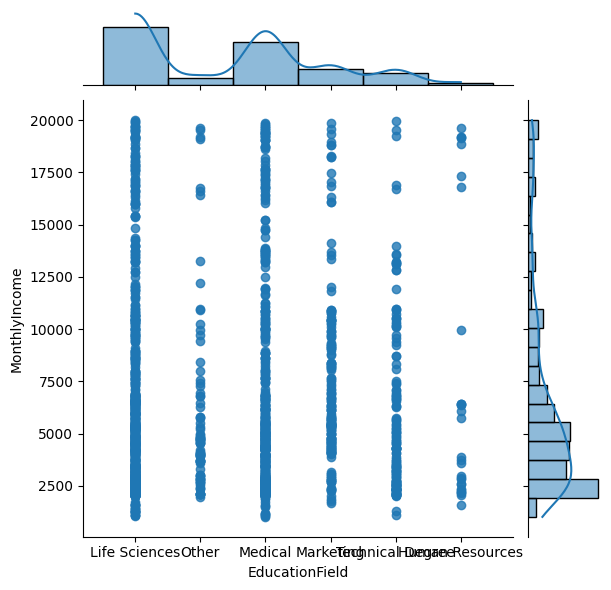

In [ ]:
t=sns.jointplot(x="EducationField",y="MonthlyIncome",data=t,kind='reg')
plt.xticks(rotation=90)


In [ ]:
t

,EmployeeID,Age,Attrition,DailyRate,Department,EducationField,MaritalStatus,MonthlyIncome
0,1313919,41,No,1102,Cardiology,Life Sciences,Single,5993
1,1200302,49,No,279,Maternity,Life Sciences,Married,5130
2,1060315,37,Yes,1373,Maternity,Other,Single,2090
3,1272912,33,No,1392,Maternity,Life Sciences,Married,2909
4,1414939,27,No,591,Maternity,Medical,Married,3468
...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,471,Neurology,Technical Degree,Single,2340
1672,1152327,46,No,1125,Cardiology,Marketing,Married,9071
1673,1812428,20,No,959,Maternity,Life Sciences,Single,2836
1674,1812429,39,No,466,Neurology,Life Sciences,Married,12742


## **LINEAR REGRESSION**

In [54]:
msk=np.random.rand(len(t))<0.8

In [55]:
train=t[msk]
test=t[~msk]

In [56]:
lm=LinearRegression()

In [57]:
x=np.asanyarray(train[["MonthlyIncome","DailyRate"]])

In [58]:
y=np.asanyarray(train[["Age"]])

In [59]:
lm.fit(x,y)

LinearRegression()

In [60]:
x_train,y_train,x_test,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [61]:
print(x_train)
print(y_train)

[[ 3904   360]
 [ 4668   689]
 [ 2438   343]
 ...
 [18665   636]
 [ 2561   289]
 [ 2991  1444]]
[[ 6540   755]
 [ 5538  1128]
 [13582  1333]
 [ 9980   635]
 [ 1081   945]
 [ 1611  1124]
 [ 2576   201]
 [ 4883  1089]
 [ 2332  1184]
 [ 4221   120]
 [ 2720   806]
 [ 2096   622]
 [ 4876   990]
 [17099  1053]
 [ 5373   136]
 [ 4157  1443]
 [ 6118   570]
 [ 5605  1395]
 [ 4227  1055]
 [ 6854   431]
 [ 2073   807]
 [18740   989]
 [ 5577   956]
 [ 5154   589]
 [ 2342   429]
 [ 8823   330]
 [ 6322   646]
 [ 2654   192]
 [ 6294   461]
 [16606   228]
 [ 3143   867]
 [ 1878  1306]
 [ 9756   176]
 [ 2659   991]
 [ 6929   218]
 [ 4325  1153]
 [16659  1311]
 [ 5914  1396]
 [ 2362   224]
 [10306   737]
 [ 2379  1297]
 [10096  1223]
 [ 2904  1309]
 [ 2593   269]
 [ 5484  1351]
 [ 2293  1357]
 [ 5769  1015]
 [ 7264   231]
 [ 4198   437]
 [ 7969   319]
 [ 8474   829]
 [ 2430  1402]
 [ 2373  1449]
 [ 5440   763]
 [ 1416  1334]
 [ 4559   542]
 [ 6781  1332]
 [19740   920]
 [ 1118   599]
 [ 3812   574]
 [ 2

In [62]:
print(x_test)
print(y_test)

[[39]
 [32]
 [43]
 ...
 [49]
 [28]
 [38]]
[[35]
 [42]
 [38]
 [36]
 [30]
 [18]
 [42]
 [32]
 [32]
 [28]
 [29]
 [25]
 [43]
 [52]
 [29]
 [26]
 [30]
 [40]
 [27]
 [54]
 [37]
 [50]
 [52]
 [45]
 [44]
 [38]
 [32]
 [45]
 [29]
 [46]
 [33]
 [18]
 [45]
 [26]
 [31]
 [34]
 [55]
 [36]
 [29]
 [35]
 [27]
 [36]
 [23]
 [42]
 [34]
 [26]
 [45]
 [30]
 [38]
 [52]
 [30]
 [35]
 [26]
 [35]
 [21]
 [31]
 [42]
 [43]
 [25]
 [29]
 [29]
 [30]
 [40]
 [50]
 [37]
 [29]
 [54]
 [38]
 [48]
 [45]
 [49]
 [27]
 [26]
 [24]
 [33]
 [44]
 [37]
 [30]
 [46]
 [50]
 [42]
 [33]
 [43]
 [29]
 [27]
 [56]
 [33]
 [34]
 [27]
 [27]
 [27]
 [29]
 [27]
 [43]
 [28]
 [19]
 [46]
 [35]
 [47]
 [32]
 [34]
 [50]
 [40]
 [34]
 [58]
 [25]
 [26]
 [33]
 [45]
 [30]
 [27]
 [35]
 [21]
 [40]
 [42]
 [25]
 [27]
 [46]
 [30]
 [29]
 [32]
 [40]
 [31]
 [27]
 [37]
 [31]
 [40]
 [46]
 [35]
 [34]
 [44]
 [59]
 [42]
 [42]
 [42]
 [27]
 [36]
 [42]
 [40]
 [28]
 [56]
 [34]
 [55]
 [52]
 [40]
 [27]
 [46]
 [29]
 [37]
 [34]
 [36]
 [36]
 [38]
 [49]
 [31]
 [55]
 [59]
 [18]
 [37]
 [35

In [63]:
k=lm.coef_

In [64]:
kk=lm.intercept_

In [65]:
kkk=k+kk
print(kkk)

[[30.19675848 30.19605956]]


In [66]:
sk=lm.predict(x_train)
sk

array([[34.21956676],
       [35.08555086],
       [32.74447624],
       ...,
       [49.10394126],
       [32.85140252],
       [33.63339969]])

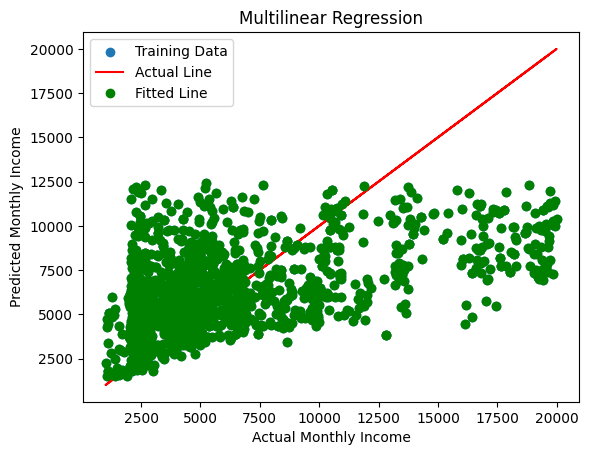

In [70]:
y= 'MonthlyIncome'

x = ['Age', 'DailyRate']


train_data, test_data = train_test_split(t, test_size=0.2, random_state=42)


X_train = train_data[x]
y_train = train_data[y]

lm = LinearRegression()
lm.fit(X_train, y_train)


y_train_pred = lm.predict(X_train)

plt.scatter(y_train, y_train_pred, label="Training Data")


plt.plot(y_train, y_train, "-r", label="Actual Line")


plt.plot(y_train, y_train_pred, "og", label="Fitted Line")

plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Multilinear Regression")
plt.legend()
plt.show()



In [74]:
x=["Age","DailyRate"]
y=["MonthlyIncome"]
train_data,test_data=train_test_split(t,test_size=0.2,random_state=42)
x_test=test_data[x]
y_test=test_data[y]

lm=LinearRegression()
lm.fit(x_test,y_test)

LinearRegression()

In [75]:
y_test_predict=lm.predict(x_test)

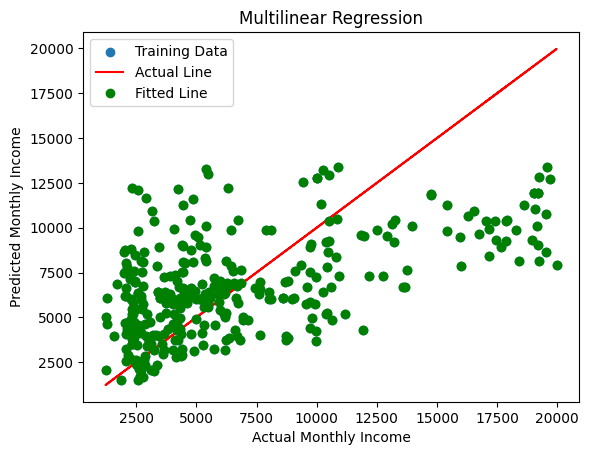

In [77]:

plt.scatter(y_test, y_test_predict, label="Training Data")


plt.plot(y_test, y_test, "-r", label="Actual Line")


plt.plot(y_test, y_test_predict, "og", label="Fitted Line")

plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Multilinear Regression")
plt.legend()
plt.show()


# **lasso**

# **Training**

In [103]:
x=["Age","DailyRate"]
y="MonthlyIncome"

train_data,test_data=train_test_split(t,random_state=42,test_size=0.2)

x_train=train_data[x]
y_train=train_data[y]





In [104]:
lasso_reg=Lasso(alpha=0.1)

In [105]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [101]:
y_train_predict=lasso_reg.predict(x_train)
y_train_predict

array([5956.19702984, 5092.69534555, 7577.12511995, ..., 5371.56335738,
       4887.65037101, 7857.82033855])

In [91]:
r2=r2_score(y_train,y_train_predict)
r2

0.24723121998608777

In [118]:
import plotly.express as px
scatter_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predict})
fig = px.scatter(scatter_data, x='Actual', y='Predicted', title='Actual vs. Predicted Values')
fig.show()
